In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
submission = pd.read_csv('sample_submission_steel.csv')
test = pd.read_csv('test_steel.csv')
train = pd.read_csv('train_steel.csv')

print('The dimensions of the train dataset is: ', train.shape)
print('The dimensions of the test dataset is: ', test.shape)

The dimensions of the train dataset is:  (19219, 35)
The dimensions of the test dataset is:  (12814, 28)


In [3]:
train.columns, test.columns

(Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
        'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
        'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
        'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
        'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
        'Dirtiness', 'Bumps', 'Other_Faults'],
       dtype='object'),
 Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
        'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 

In [4]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [6]:
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [8]:
test.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

In [11]:
train.describe().style.background_gradient(cmap='coolwarm')

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1849756.040012,1846605.345439,1683.987616,95.654665,64.124096,191846.678235,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1903553.850679,1896295.137914,3730.319865,177.821382,101.054178,442024.694057,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6712.000000,6724.000000,6.000000,2.000000,1.000000,250.000000,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,657468.000000,657502.000000,89.000000,15.000000,14.000000,9848.000000,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1398169.000000,1398179.000000,168.000000,25.000000,23.000000,18238.000000,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2368032.000000,2362511.000000,653.000000,64.000000,61.000000,67978.000000,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,12987661.000000,12987692.000000,152655.000000,7553.000000,903.000000,11591414.000000,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

Text(0.5, 0, 'Frequncy')

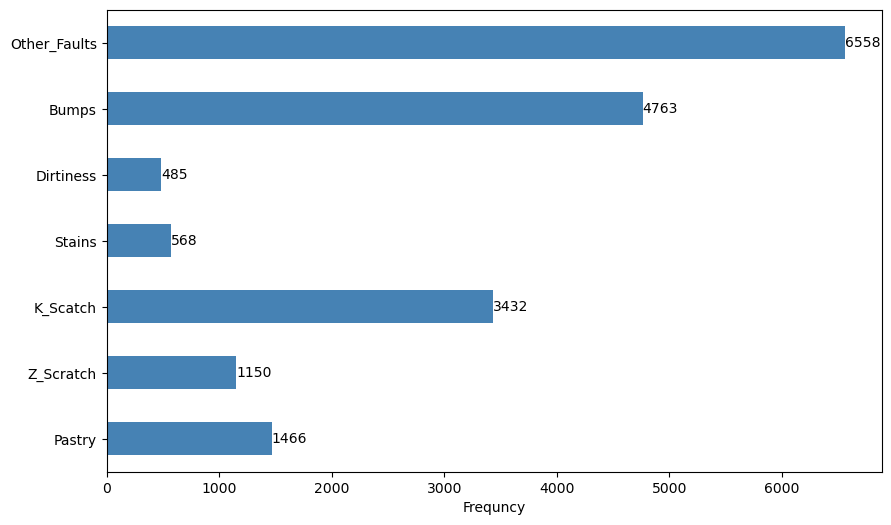

In [14]:
ax = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum(axis=0).plot(kind='barh', color='steelblue', figsize=(10, 6))
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Frequncy')

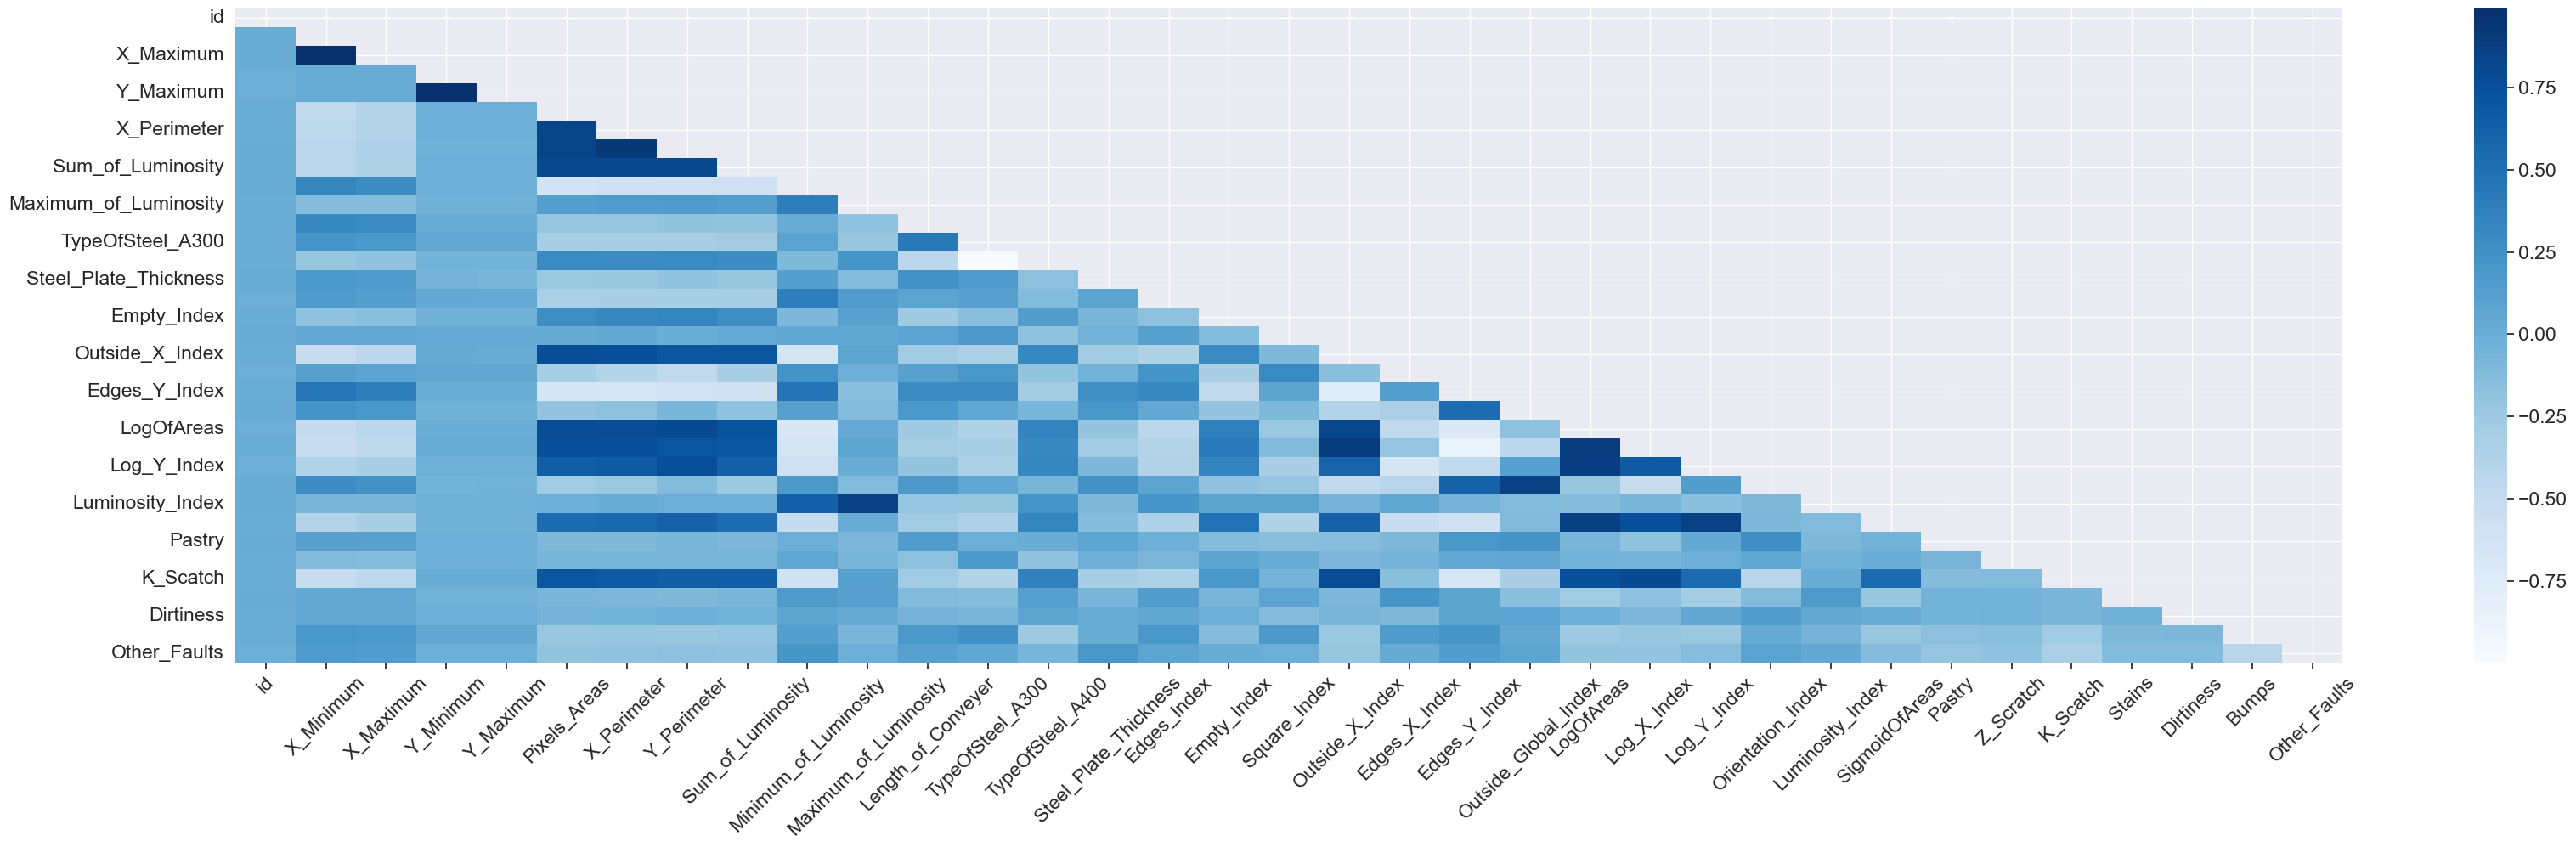

In [15]:
plt.figure(figsize=(40, 10))
k=34
corr = train.corr()
cm = np.corrcoef(train.values.T)
sns.set_theme(font_scale=1.5)
mask = np.triu(np.ones_like(corr, dtype=bool))
hm = sns.heatmap(corr, mask=mask, cbar=True, annot=True,fmt='.2f', annot_kws={'size': 10}, xticklabels=train.columns, cmap='Blues')
hm.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=45, ha='center')
plt.show()

In [16]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']
train_cols = [column for column in train.columns if column not in targets + ['id']]
train_cols

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

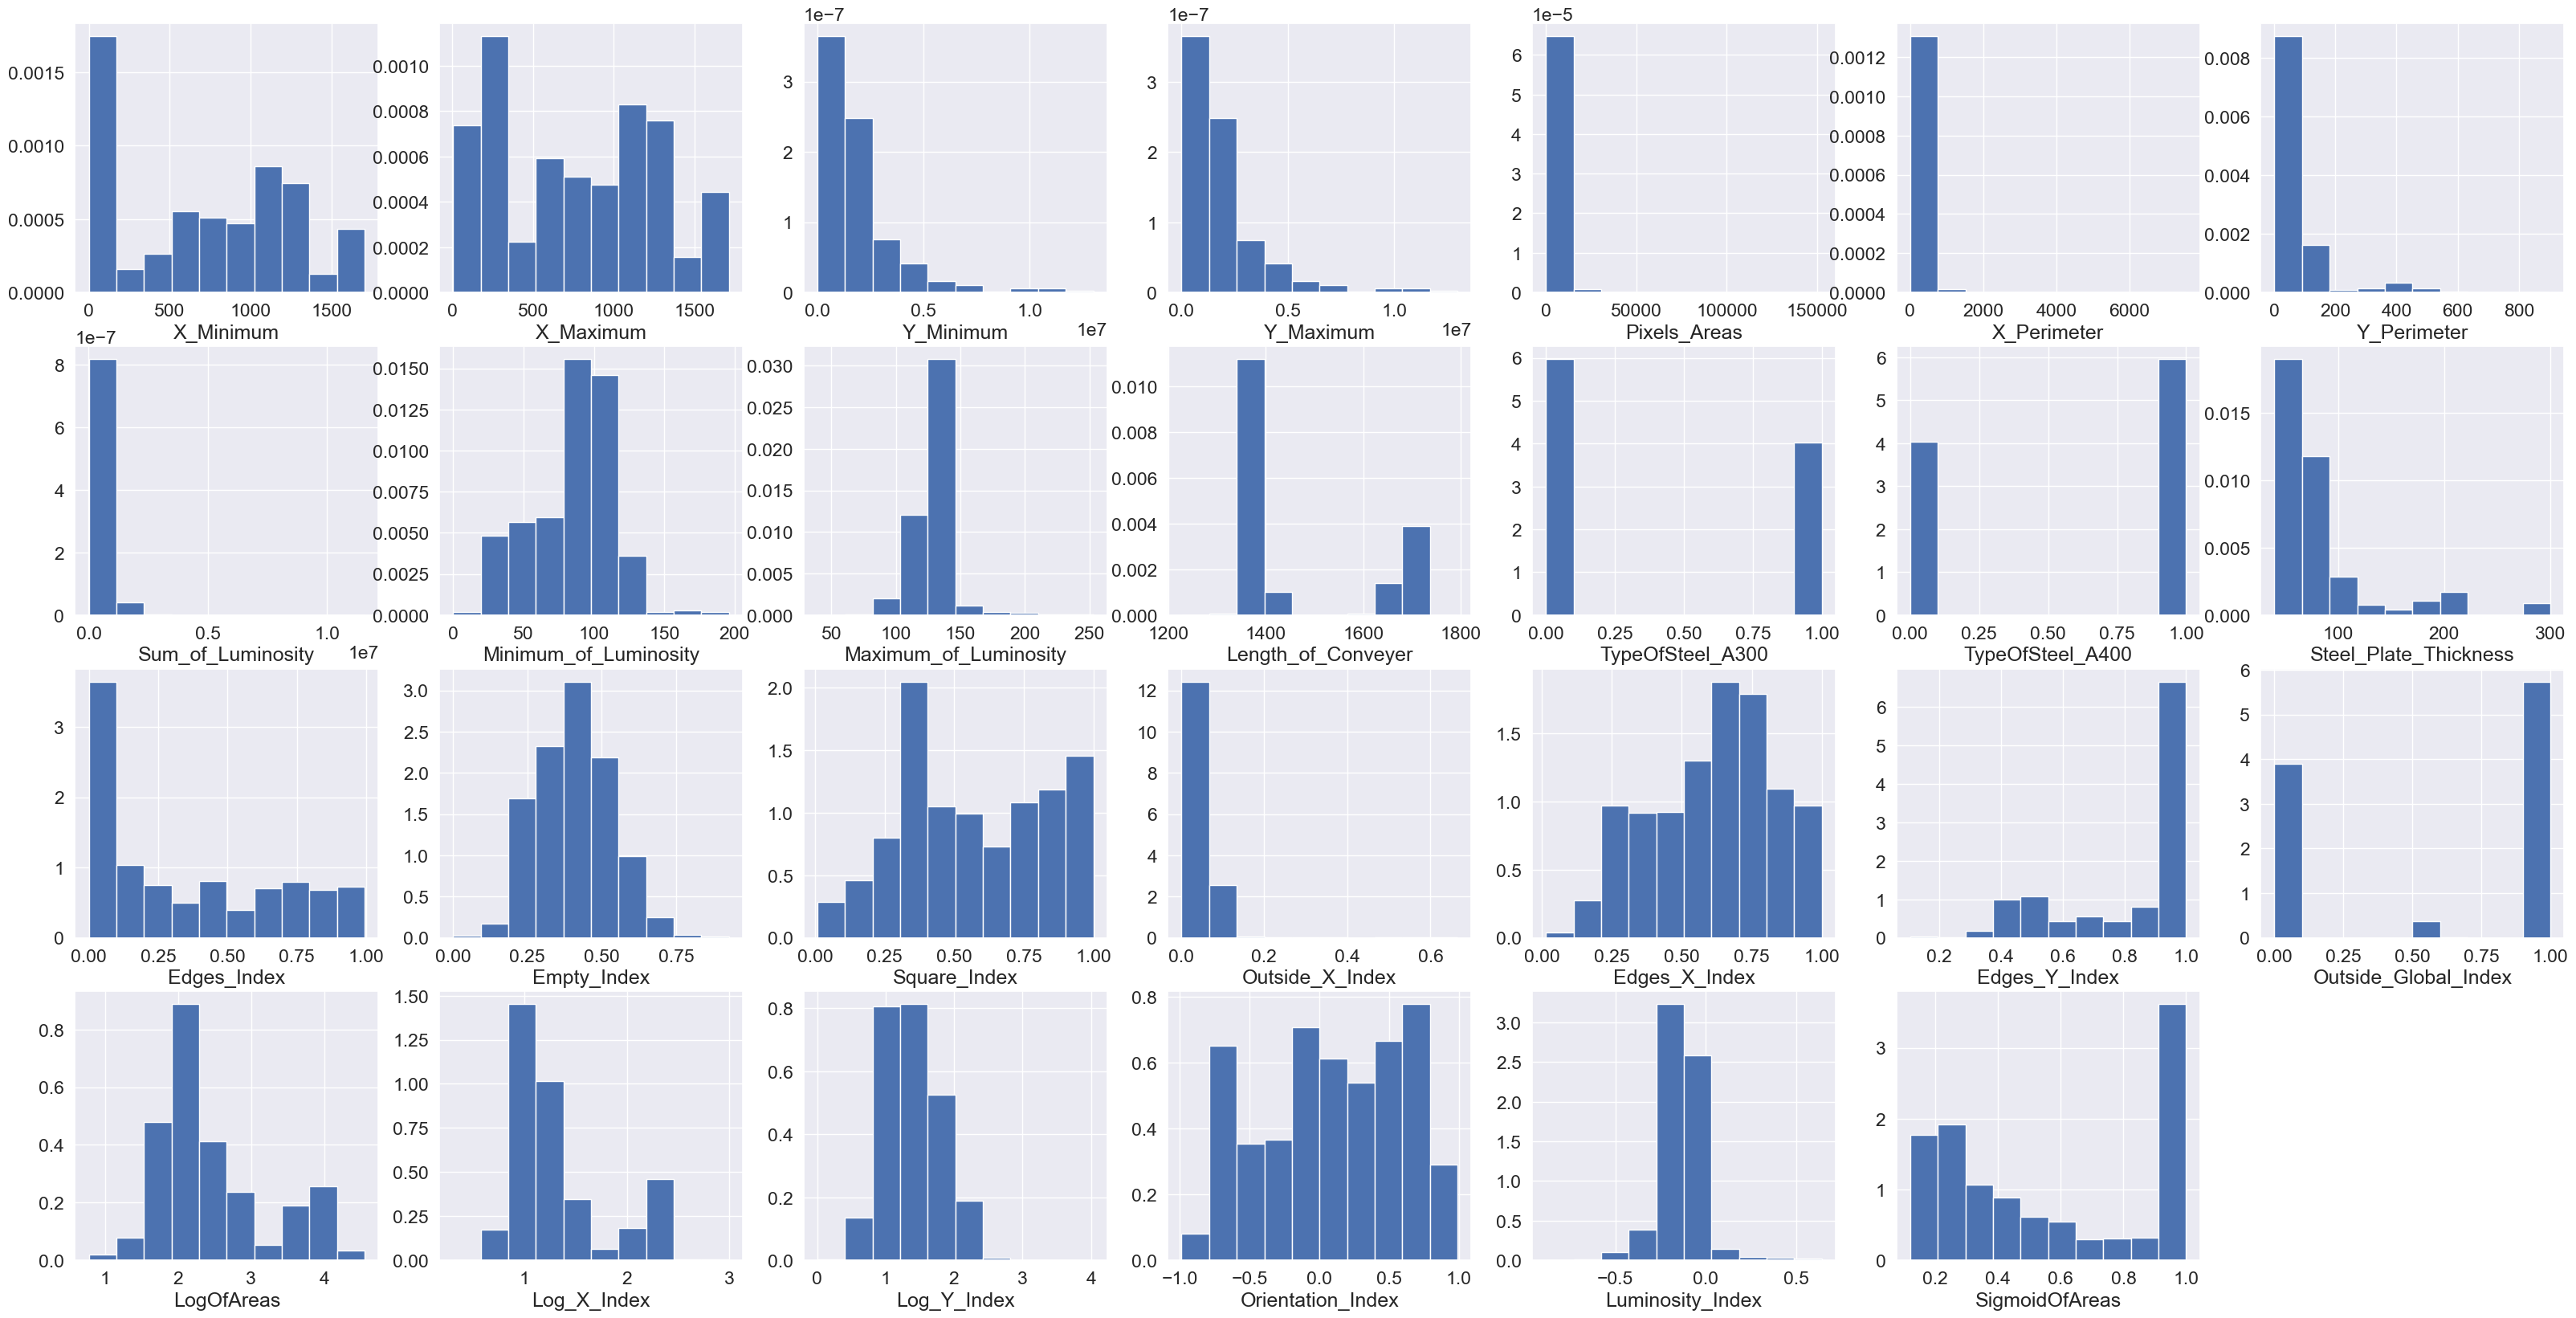

In [17]:
plt.figure(figsize=(40, 20))

for index, col in enumerate(train.iloc[:, 1:-7].columns, start=1):
    plt.subplot(4, 7, index)
    plt.hist(train[col], density=True)
    plt.xlabel(col)
    
plt.show()

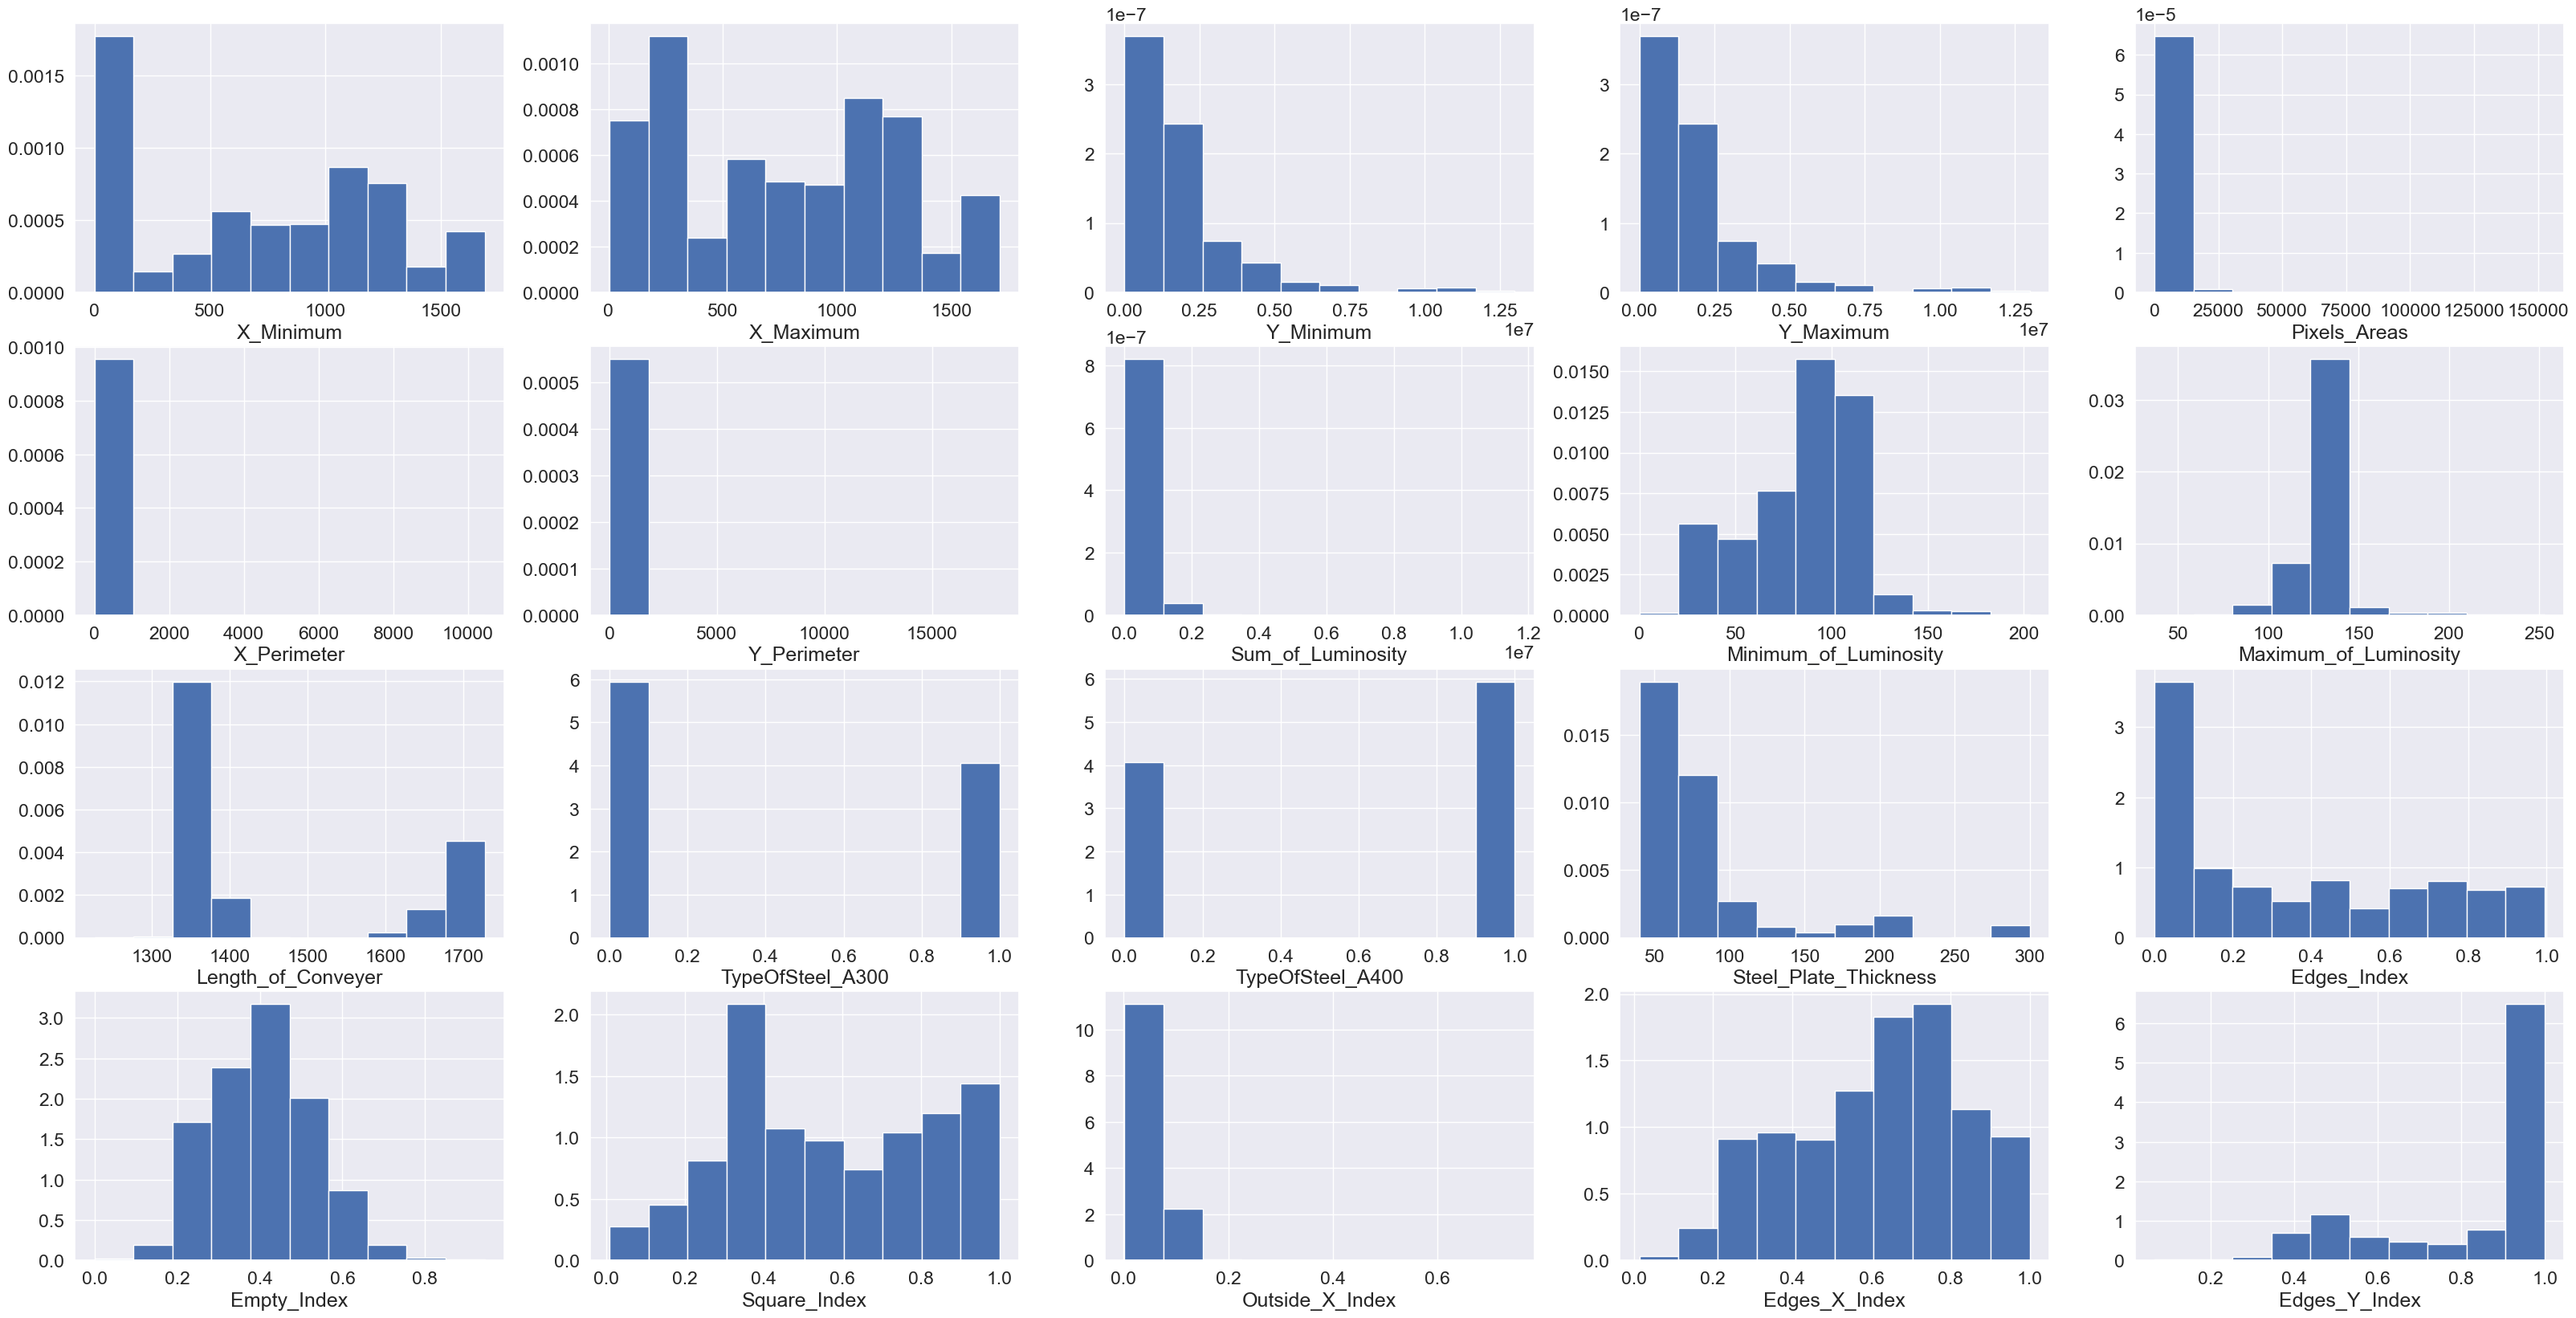

In [18]:
plt.figure(figsize=(40, 20))

for index, cols in enumerate(test.iloc[:, 1:-7].columns, start=1):
    plt.subplot(4, 5, index)
    plt.hist(test[cols], density=True)
    plt.xlabel(cols)
    
plt.show()

In [19]:
num_cols = train.select_dtypes(include=['int']).columns
num_cols

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [20]:
num_cols_t = test.select_dtypes(include=['int']).columns
num_cols_t

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness'],
      dtype='object')

In [21]:
# from sklearn.preprocessing import QuantileTransformer
# nqt = QuantileTransformer(output_distribution='normal')

# for col in num_cols:
#     train[col] = nqt.fit_transform(train[[col]])

In [22]:
# plt.figure(figsize=(40, 20))

# for index, col in enumerate(train.iloc[:, 1:-7].columns, start=1):
#     plt.subplot(4, 7, index)
#     plt.hist(train[col], density=True)
#     plt.xlabel(col)
    
# plt.show()

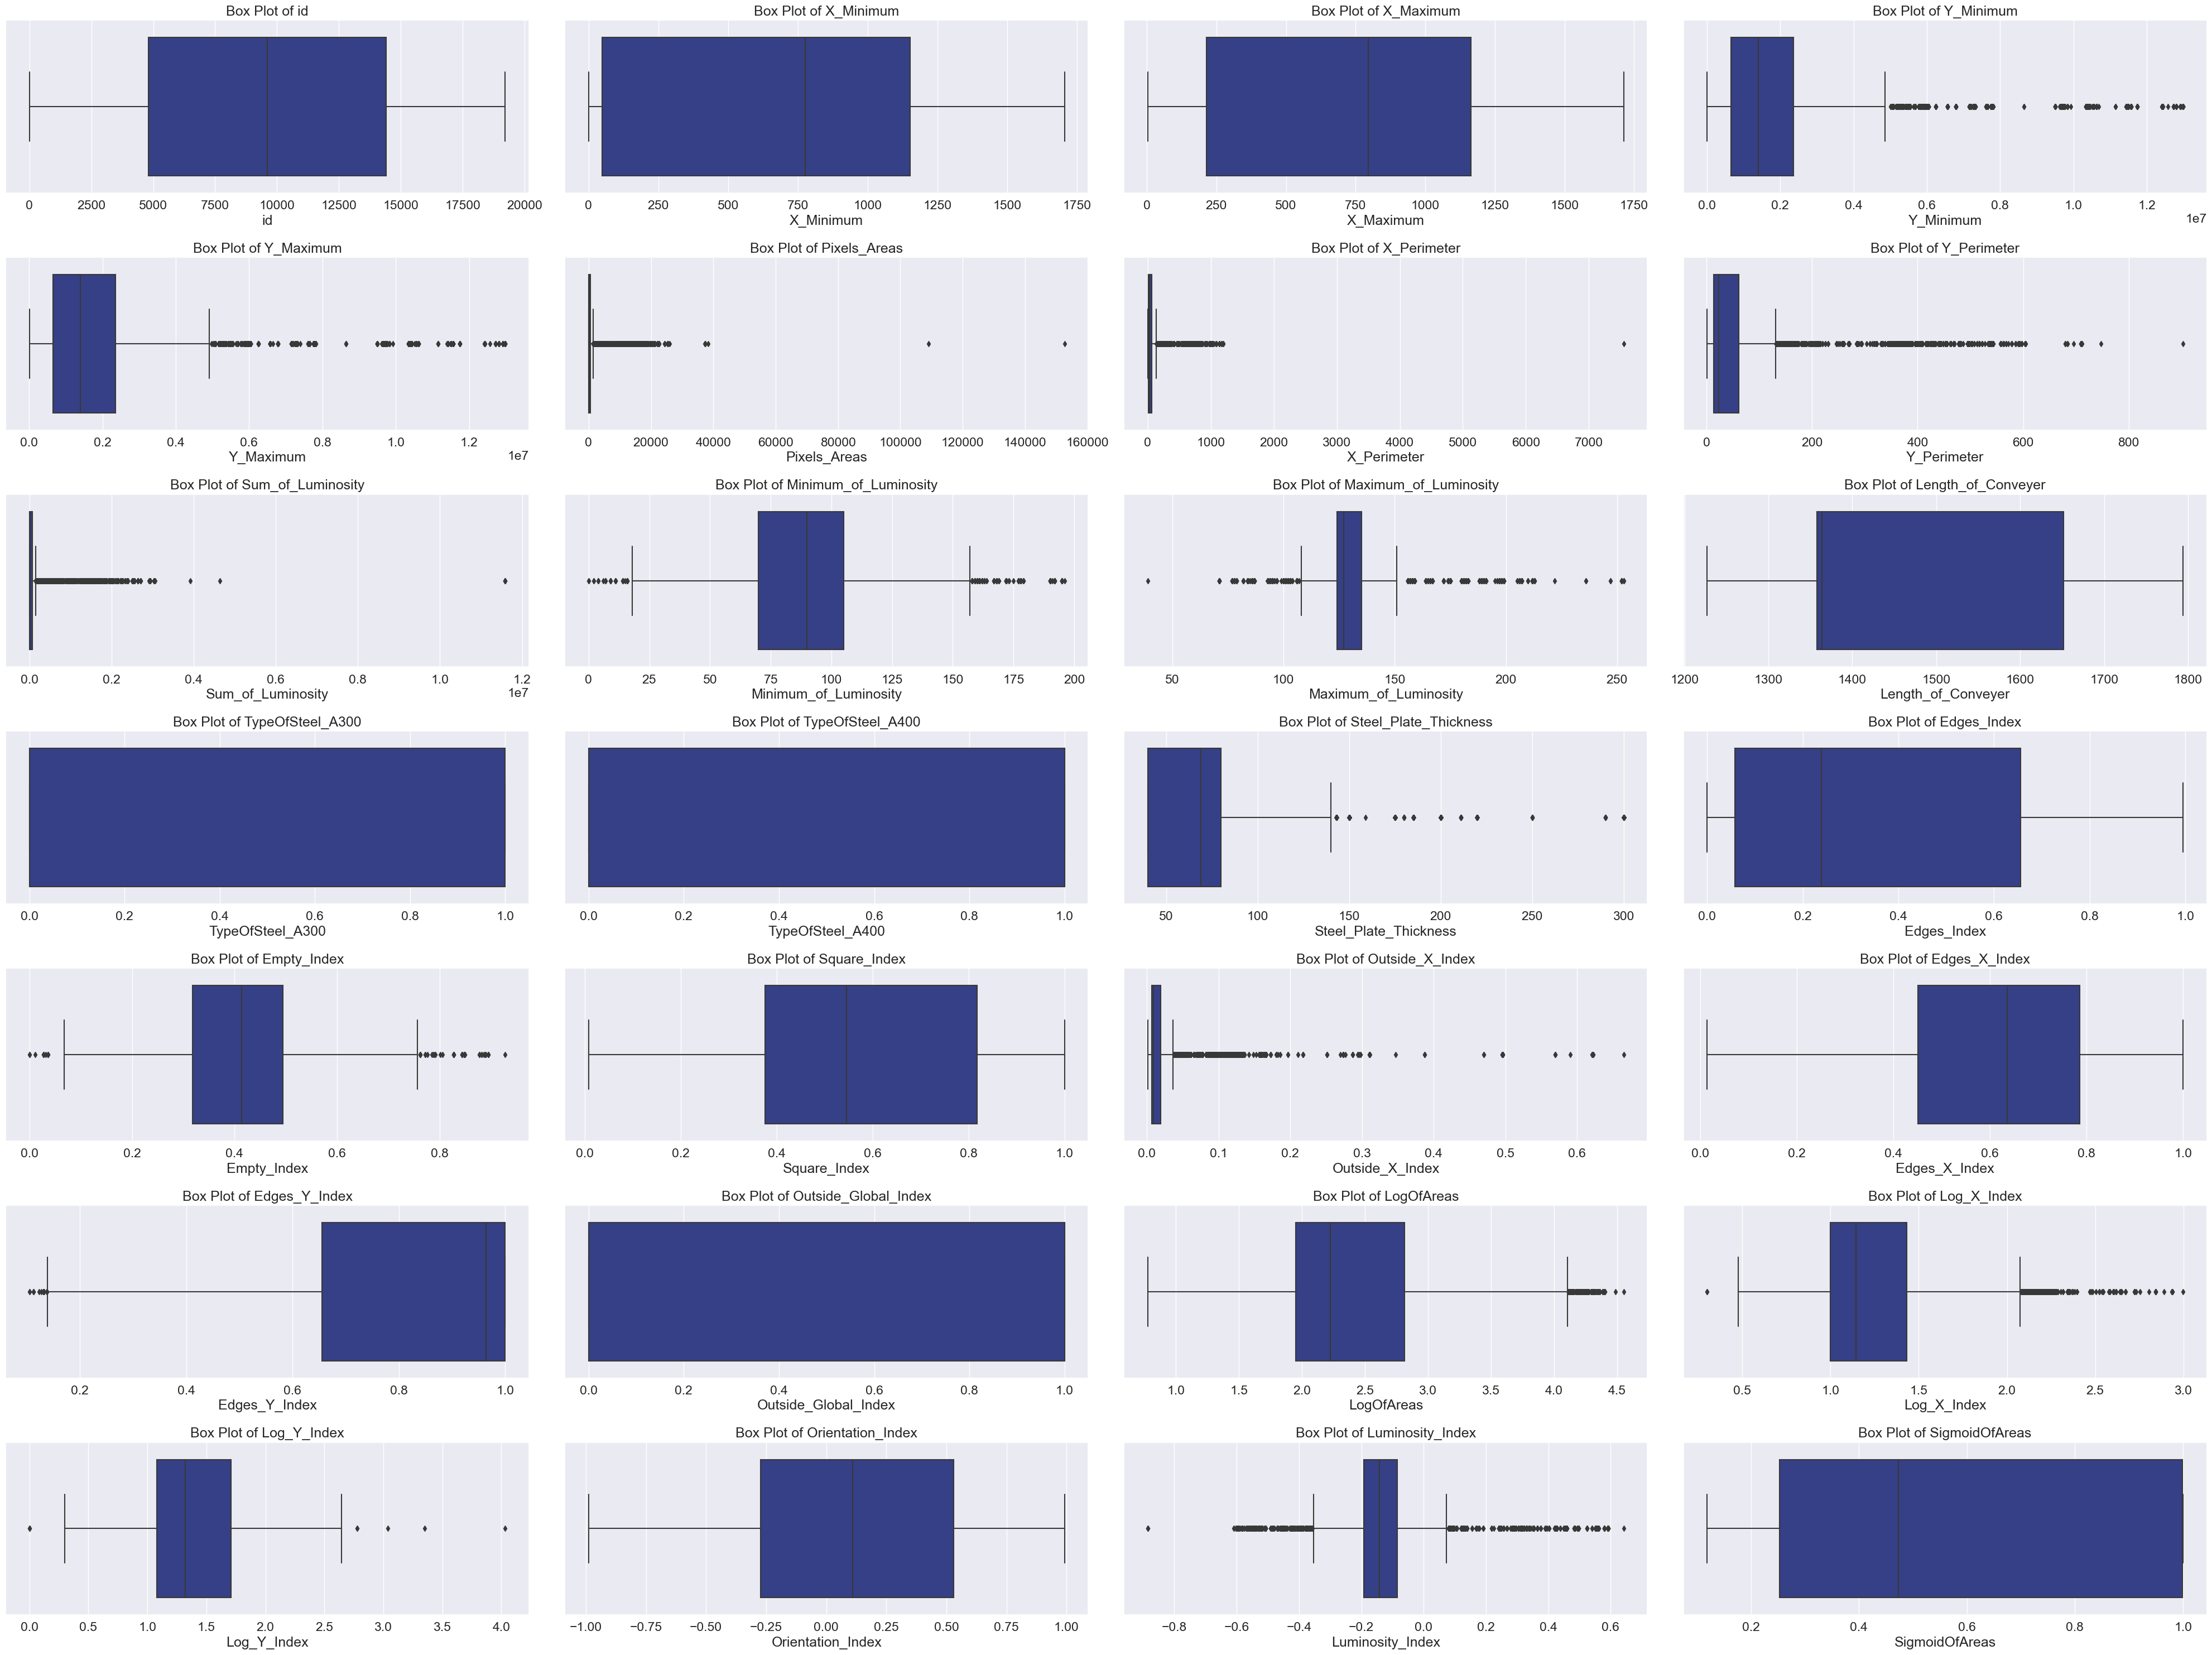

In [23]:
# Setting rows and columns numbers
num_rows = 7
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 30))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate through features and add box plots to subplots
for i, column in enumerate(train.select_dtypes(include='number')):
    # Create box plot for the current feature
    if i < len(axes):
        sns.boxplot(x=train.select_dtypes(include='number')[column], ax=axes[i], color='#293693')
        
        # Set title and labels
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
#Let's Create a single target variable
# Target Columns
target_col = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
# Function
def combine_target_variables(row):
    defect = None
    for col in target_col:
        if row[col] == 1:
            defect = col
            break
    if defect:
        return defect
    else:
        return 'No Defect'
    
train['Target'] = train.apply(combine_target_variables, axis=1)

In [25]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults


In [26]:
train.drop(columns=['Target'], inplace=True)

In [27]:
target_column = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [28]:
X = train.drop(target_column, axis=1)
y = train[target_column]

# Train Test Split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [29]:
# Define XGBoost parameters
xgboost_params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    #"max_depth": 12,
    "learning_rate": 0.005,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "alpha": 0.001,
    "lambda": 0.001,
    "gamma": 0.1,
    "min_child_weight": 5,
    "n_estimators": 1500,
    "random_state": 42
}
submission[target_column] = 0
# Initialize XGBoost classifier
xgboost_model = xgb.XGBClassifier(**xgboost_params)

# List to store AUC scores for each target variable
auc_scores = []

# Perform cross-validation for each target variable
for target in target_column:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=42)
    
    # Fit the model
    xgboost_model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

    # Add predictions to submission DataFrame
    submission[target] += xgboost_model.predict_proba(test)[:, 1]

# Calculate mean AUC score
mean_auc_score = np.mean(auc_scores)

# Print mean AUC score
print("Mean AUC Score (XGBoost):", mean_auc_score)

Mean AUC Score (XGBoost): 0.8875010438279355


In [30]:
# Grid search CV for hyperparameter tuning of XGBoost model
#from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
#param_grid = {
#    "max_depth": [3, 6, 9, 12],
#    "learning_rate": [0.001, 0.01, 0.1, 0.2],
#    "subsample": [0.5, 0.7, 0.9],
#    "colsample_bytree": [0.5, 0.7, 0.9],
#    "alpha": [0.001, 0.01, 0.1, 1],
#    "lambda": [0.001, 0.01, 0.1, 1],
#    "gamma": [0.001, 0.01, 0.1, 1],
#    "min_child_weight": [1, 5, 10, 15]
#}

# Initialize XGBoost classifier
#xgboost_model = xgb.XGBClassifier(n_estimators=1500, random_state=42)

# Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform Grid Search
#grid_search.fit(X, y)

# Get best parameters
#best_params = grid_search.best_params_

# Print best parameters
#print("Best Parameters:", best_params)

In [33]:
# Save submission file
submission.to_csv('submission.csv', index=False)

In [34]:
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.965621,0.001180,0.004765,0.000220,0.045202,0.222608,0.732301
1,19220,0.274499,0.019165,0.005205,0.000292,0.399458,0.169625,0.783458
2,19221,0.001616,0.048136,0.061066,0.000805,0.017115,0.430072,0.922308
3,19222,0.183436,0.001482,0.000977,0.001627,0.017293,0.673972,0.913684
4,19223,0.002354,0.001089,0.001288,0.001635,0.023640,1.248103,0.607882
